## Fraude de cartão de crédito

### Fonte de Dados:

- Os pagamentos digitais estão evoluindo, mas os criminosos cibernéticos também.

- De acordo com o Data Breach Index, mais de 5 milhões de registros são roubados diariamente, uma estatística preocupante que mostra - a fraude ainda é muito comum tanto para pagamentos do tipo Cartão-Presente quanto Cartão-Não Presente.

- No mundo digital de hoje, onde trilhões de transações com cartões acontecem por dia, a detecção de fraudes é um desafio.


### Explicação do das variáveis:

* **distancefromhome** - a distância de casa onde a transação aconteceu.

* **distancefromlast_transaction** - a distância da última transação aconteceu.

* **ratiotomedianpurchaseprice** - Razão da transação do preço de compra para o preço de compra mediano.

* **repeat_retailer** - É a transação que aconteceu do mesmo varejista.

* **used_chip** - É a transação através de chip (cartão de crédito).

* **usedpinnumber** - A transação aconteceu usando o número PIN.

* **online_order** - A transação é um pedido online.

* **fraude** - A transação é fraudulenta.

## Subindo a base de dados:

Importação de bibliotecas

In [14]:
import pandas as pd # Para trabalhar com dados tabulares
from sklearn.model_selection import train_test_split #separação dos dados
from sklearn.neighbors import KNeighborsClassifier #modelo de machine learning classificação
from sklearn.metrics import accuracy_score #avaliação do modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report #métricas de avaliação
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Feature Engineer
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
import numpy as np #transformação dos dados
import warnings #remoção de avisos


dados = pd.read_csv('card_transdata.csv', sep=',') 
dados.head(3) # analisando os primeiros dados

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0


## Tratando inconsistências na base

In [15]:
dados.isnull().sum() 

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [16]:
dados = dados.dropna()

In [17]:
#Número de transações fraudulentas
dados[dados["fraud"] == 1].fraud.count() #filtro com contagem dos dados

np.int64(87403)

In [18]:
Total = len(dados)
TotalNaoFraudes = dados[dados["fraud"] == 0].fraud.count()
TotalFraudes = dados[dados["fraud"] == 1].fraud.count()

Percentual_Fraudes = TotalFraudes / Total 

print("Total de dados: ", Total)
print("Total de não fraudes: ", TotalNaoFraudes)
print("Total de fraudes: ", TotalFraudes)
print("Percentual de fraudes na base: ", (round(Percentual_Fraudes, 2)*100), "%")

Total de dados:  1000000
Total de não fraudes:  912597
Total de fraudes:  87403
Percentual de fraudes na base:  9.0 %


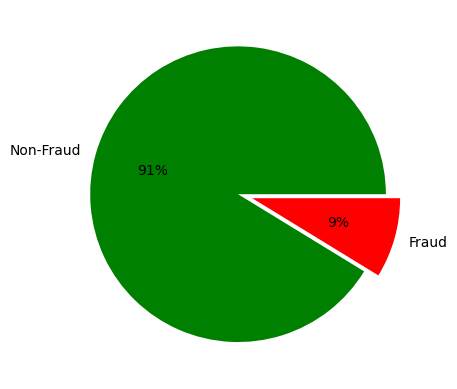

In [19]:
categororias = ["Non-Fraud", "Fraud"]
plt.pie(dados["fraud"].value_counts(), labels = categororias, autopct = "%.0f%%", explode= (0, 0.1), colors = ("g", "r"))
plt.show()

In [20]:
dados_fraudes = dados[dados["fraud"] == 1]
dados_fraudes.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0


/tmp/ipykernel_1406746/2942852887.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "repeat_retailer", palette = "Paired", data = dados_fraudes) #Aconteceu no mesmo varejista?
/tmp/ipykernel_1406746/2942852887.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "used_chip", palette = "Paired", data = dados_fraudes) #Uso de cartão de crédito?
/tmp/ipykernel_1406746/2942852887.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "used_pin_number", palette = "Paired", data = dados_fraudes) #Utilizou o mesmo número de PIN?
/t

<Axes: xlabel='online_order', ylabel='count'>

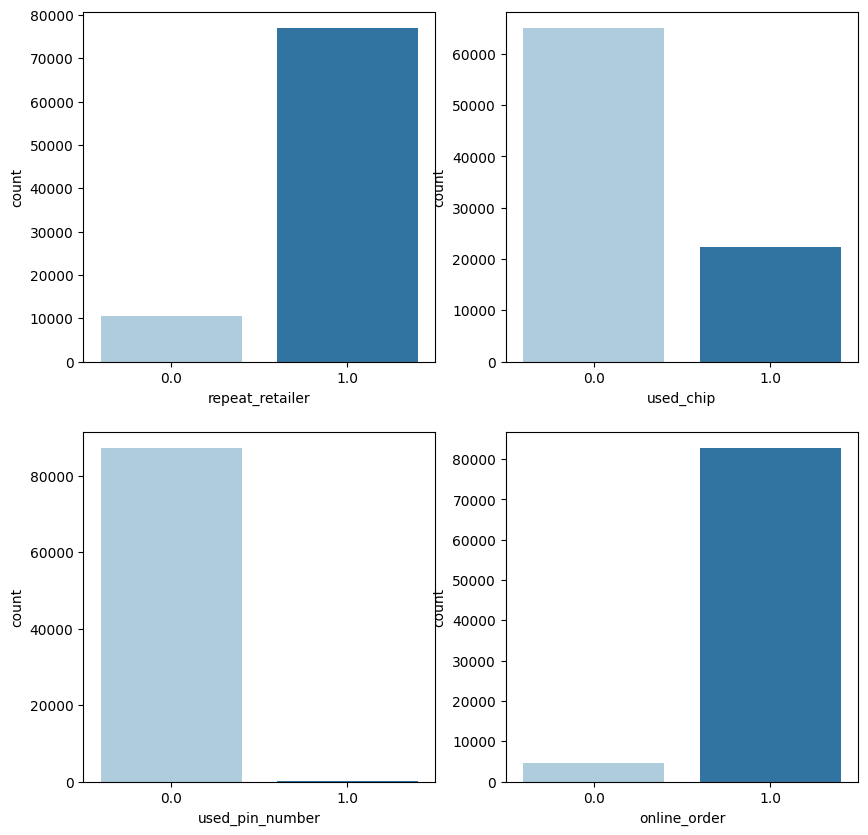

In [21]:
plt.figure(figsize = (10,10)) #Configurando o tamanho da visualização

plt.subplot(2,2,1)
sns.countplot(x = "repeat_retailer", palette = "Paired", data = dados_fraudes) #Aconteceu no mesmo varejista?

plt.subplot(2,2,2)
sns.countplot(x = "used_chip", palette = "Paired", data = dados_fraudes) #Uso de cartão de crédito?

plt.subplot(2,2,3)
sns.countplot(x = "used_pin_number", palette = "Paired", data = dados_fraudes) #Utilizou o mesmo número de PIN?

plt.subplot(2,2,4)
sns.countplot(x = "online_order", palette = "Paired", data = dados_fraudes) #Foi em uma compra online?

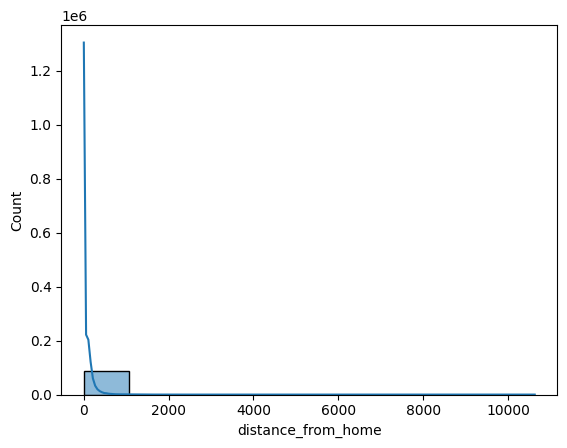

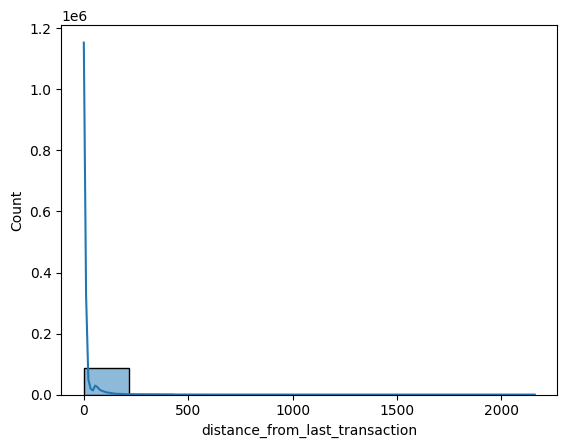

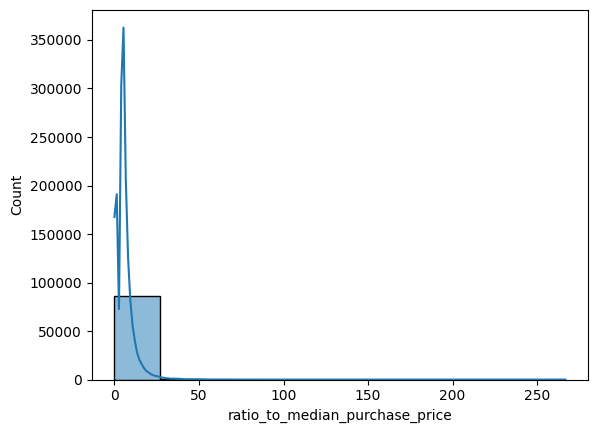

In [22]:
Colunas_Numericas = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]
for column in Colunas_Numericas:
    plt.figure()
    plot = dados_fraudes[column]
    sns.histplot(plot, bins=10, kde=True)
    plt.show()

In [23]:
for column in [0, 1, 2]:
    dados_fraudes.iloc[:, column] = np.log10(dados_fraudes.iloc[:, column]) #transformação logarítma

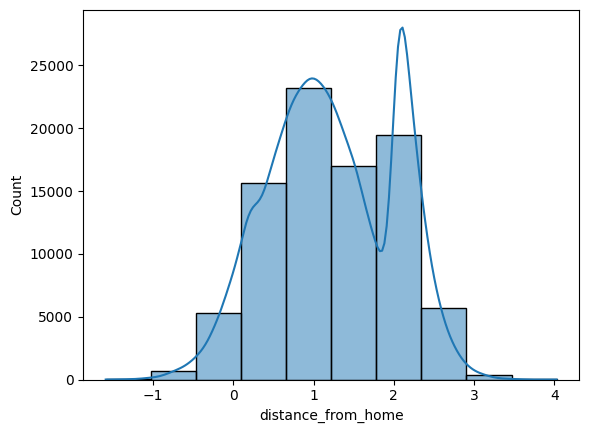

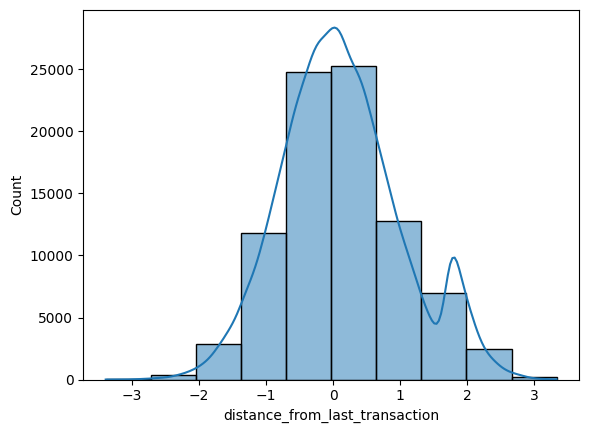

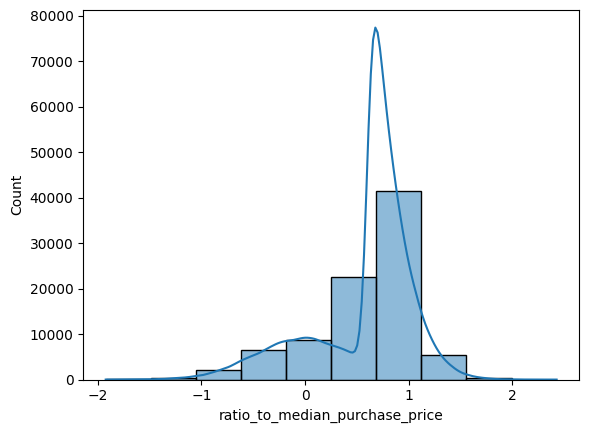

In [24]:
Colunas_Numericas_Normal = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]
for column in Colunas_Numericas_Normal:
    plt.figure()
    plot = dados_fraudes[column]
    sns.histplot(plot, bins=10, kde=True)
    plt.show()

<Axes: >

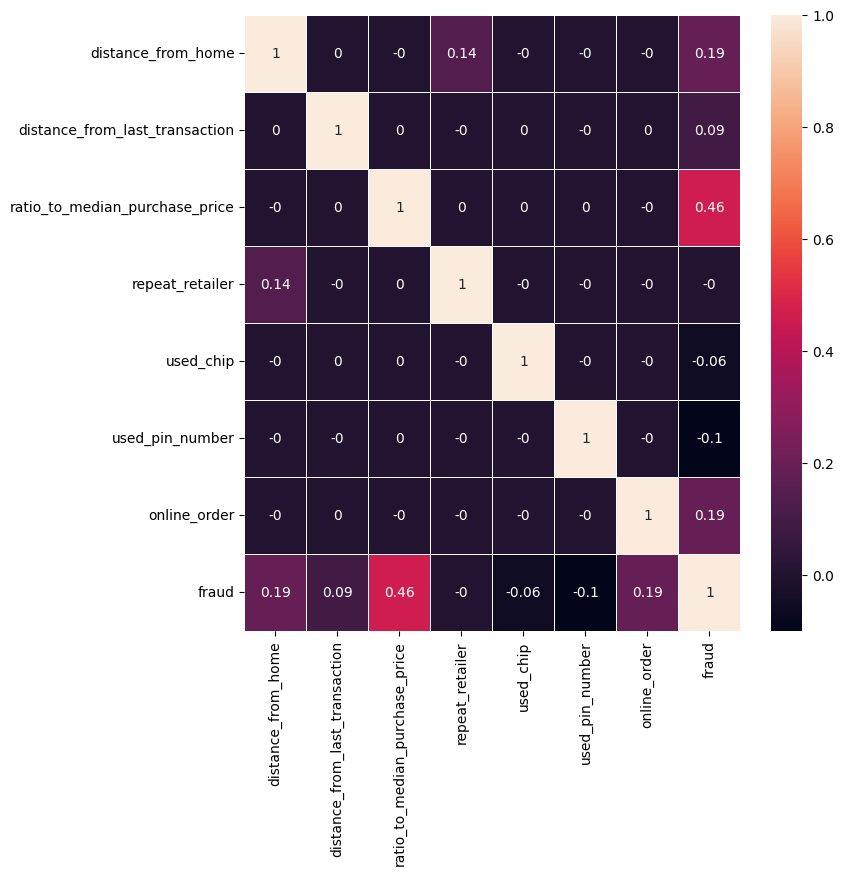

In [25]:
round(dados_fraudes.distance_from_last_transaction.mean(),2)
round(dados_fraudes.distance_from_last_transaction.std(),2)

correlation_matrix = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

## Criação do modelo de Machine Learming

In [26]:
x = dados[['distance_from_home','ratio_to_median_purchase_price', 'online_order']]
y = dados['fraud'] #target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,
                                                    random_state=7) #20% para teste e 80% de treino

### Feature Engineer

Comparação da escala normal das variáveis vs. escalonamento das variáveis

- Comparação do real x dados transformado (normalização e padronização)
* padronização: zera a média e deixa o desvio padrão unitário.( obteremos desvios-padrão menores por meio do processo de normalização minmaxscaler).
* normalização: coloca a variável na escala entre 0 até 1.

- Análise da plotagem real e verificar se está muito diferente da plotagem com standerscaler e minmaxsclaer.
- Escolha o tipo de transformação de escala que melhor se adequa a suas variáveis. Se o desenho do gráfico mudar, você está descaracterizando o dado.


Transformar e normlaizar a escala das variáveis.

In [27]:
#scaler = StandardScaler() 
scaler = MinMaxScaler() 
scaler.fit(x_train)

MinMaxScaler()

In [28]:
# Na hora de transformar, devemos transformar ambos os conjuntos
x_train_escalonado = scaler.transform(x_train)#treino
x_test_escalonado = scaler.transform(x_test)#teste

/home/lucas/Study/projects/IA-Studies/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/lucas/Study/projects/IA-Studies/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/lucas/Study/projects/IA-Studies/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/lucas/Study/projects/IA-Studies/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/lucas/Study/projects/IA-Studies/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, 

Text(0, 0.5, 'Mean Error')

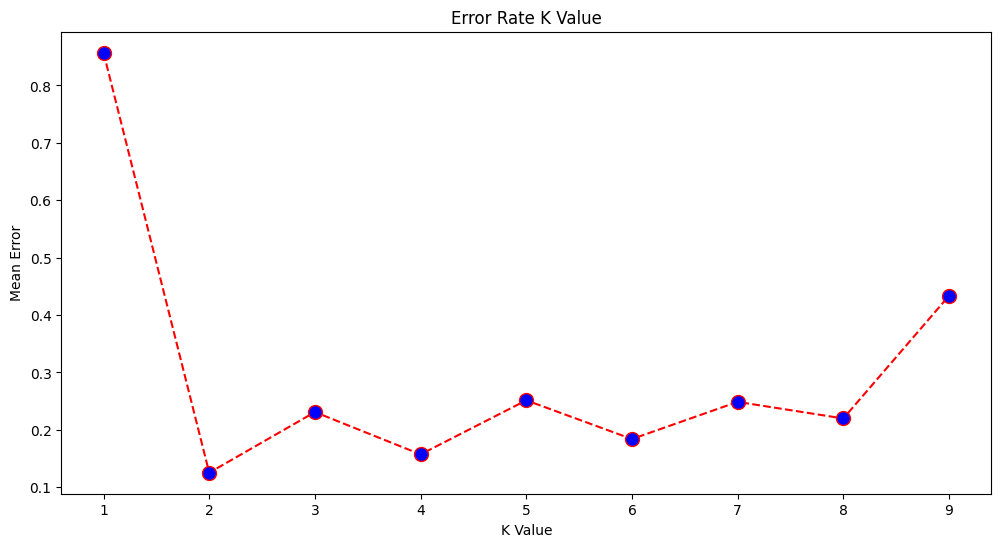

In [29]:
error = []

# Calculating error for K values between 1 and 10
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_escalonado, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [30]:
# Hiperparametro do nosos modelo é o número de vizinhos considerado (n_neighbors)
modelo_classificador = KNeighborsClassifier(n_neighbors=5)
# Está fazendo o treinamento do meu modelo de ML
modelo_classificador.fit(x_train_escalonado, y_train)

KNeighborsClassifier()

In [31]:
y_predito = modelo_classificador.predict(x_test_escalonado) #defininfo as predições

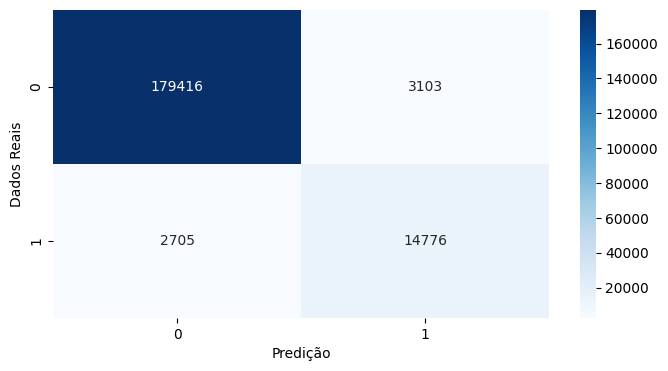

In [32]:
matriz_confusao = confusion_matrix(y_test, y_predito)
plt.figure(figsize = (8, 4))
sns.heatmap(matriz_confusao, annot = True, fmt="d",cmap = "Blues")
plt.xlabel("Predição");
plt.ylabel("Dados Reais");

In [33]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predito))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98    182519
         1.0       0.83      0.85      0.84     17481

    accuracy                           0.97    200000
   macro avg       0.91      0.91      0.91    200000
weighted avg       0.97      0.97      0.97    200000

